In [29]:
import	pandas	as	pd
weather_df =	pd.read_csv('../Data/Daegu_utf8_revised.csv',	encoding='utf-8-sig')
print(weather_df.columns)
print(weather_df['날짜'].dtype)	#	날짜 컬럼은 object	타입
weather_df.columns=['날짜',	'지점',	'평균기온',	'최저기온',	'최고기온'] # 특수 문자 제거 후 저장
print(weather_df.columns)

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
object
Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')


In [30]:
#weather_df['날짜']=weather_df['날짜'].astype("datetime64[ns]")

In [31]:
#'날짜' 컬럼의 데이터 타입을 datatime으로 변경
weather_df['날짜']	=	pd.to_datetime(weather_df['날짜'],	format='%Y-%m-%d')
print(weather_df['날짜'].dtype)

datetime64[ns]


In [32]:
#누락값 개수 구하기
print(weather_df.head(5))
print(weather_df.shape)
num_rows =	weather_df.shape[0]	#	shape(row,	col),	shape[0]:	row의 개수
num_missing =	num_rows - weather_df.count()	#	count():	정상값의 개수
print(num_missing)

          날짜   지점  평균기온  최저기온  최고기온
0 1907-01-31  143   NaN  -7.0   0.8
1 1907-02-01  143   NaN   NaN   NaN
2 1907-02-02  143   NaN   NaN   NaN
3 1907-02-03  143   NaN   NaN   NaN
4 1907-02-04  143   NaN   NaN   NaN
(42727, 5)
날짜        0
지점        0
평균기온    703
최저기온    629
최고기온    630
dtype: int64


In [33]:
print(weather_df.count())
weather_df=weather_df.dropna(axis=0) # NaN이 포함된 행을 제거
print(weather_df.count())
print(weather_df.head(5))

날짜      42727
지점      42727
평균기온    42024
최저기온    42098
최고기온    42097
dtype: int64
날짜      42022
지점      42022
평균기온    42022
최저기온    42022
최고기온    42022
dtype: int64
            날짜   지점  평균기온  최저기온  최고기온
701 1909-01-01  143  -4.1  -8.0   0.1
702 1909-01-02  143  -0.8  -6.7   6.1
703 1909-01-03  143   1.0  -2.4   3.6
704 1909-01-04  143   4.2   0.0   9.2
705 1909-01-05  143   3.4  -0.4   9.0


In [34]:
weather_df.to_csv('daegu-utf8-df.csv',	index=False,	mode='w',	encoding='utf-8-sig')

In [35]:
year_df =	weather_df[weather_df['날짜'].dt.year ==	2023] # datetime Series 객체 접근 방법 -> .dt로 접근한다!
month_df =	year_df[year_df['날짜'].dt.month ==	8] # 연쇄적으로 필터링해서 month_df에는 23년 8월 자료밖에 없다(자료 31개)
print(month_df.head()) 

              날짜   지점  평균기온  최저기온  최고기온
42551 2023-08-01  143  29.7  24.9  34.8
42552 2023-08-02  143  30.0  23.9  34.7
42553 2023-08-03  143  31.5  27.0  37.7
42554 2023-08-04  143  30.5  26.0  34.7
42555 2023-08-05  143  31.5  25.7  37.2


In [36]:
max_temp_mean =	round(month_df['최고기온'].mean(),	1)
min_temp_mean =	round(month_df['최저기온'].mean(),	1)
print(f'2023년 8월 최저기온 평균:{min_temp_mean},	최고기온 평균 :{max_temp_mean}')

2023년 8월 최저기온 평균:24.0,	최고기온 평균 :31.9


1990년대 5월 최고 기온 평균:	[24.2, 24.5, 24.1, 25.3, 25.3, 24.9, 26.1, 25.9, 25.4, 25.4]
2010년대 5월 최고 기온 평균:	[25.3, 24.2, 26.2, 26.8, 27.9, 28.0, 26.7, 27.5, 24.8, 27.5]
1990년대 5월 전체 최고 기온 평균:	25.1
2010년대 5월 전체 최고 기온 평균:	26.5


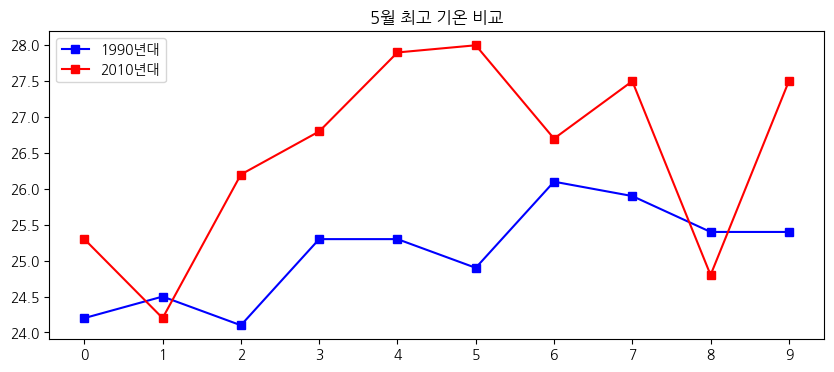

In [37]:
import matplotlib.pyplot as plt
import koreanize_matplotlib


def	draw_two_plots(title,	x_data,	max_temp_list1,	label_y1,	max_temp_list2,	label_y2):
    plt.rcParams['axes.unicode_minus']	=	False		
    plt.figure(figsize=(10,	4))
    plt.plot(x_data,	max_temp_list1,	marker='s',	markersize=6,	color='b',	label=label_y1)
    plt.plot(x_data,	max_temp_list2,	marker='s',	markersize=6,	color='r',	label=label_y2)
    plt.xticks(x_data)		#	모든 xtick값을 출력함
    #plt.ylim(10,	40)
    plt.title(title)
    plt.legend()
    plt.show()
    
def	main():
    search_month =	int(input("달을 입력하세요:	"))
    weather_df =	pd.read_csv('daegu-utf8-df.csv',	encoding='utf-8-sig')
    weather_df['날짜']	=	pd.to_datetime(weather_df['날짜'],	format='%Y-%m-%d')
    first_decade_max_temp_list =	[0]	*	10		#	10년 동안 각 월의 평균 저장
    second_decade_max_temp_list =	[0]	*	10
    first_decade =	1990
    second_decade =	2010
    for	year	in	range(10):
        first_decade_df =	weather_df[(weather_df['날짜'].dt.year ==	first_decade +	year)&(weather_df['날짜'].dt.month ==	search_month)]
        first_decade_max_temp_list[year]	=	round(first_decade_df['최고기온'].mean(),	1)
        second_decade_df =	weather_df[(weather_df['날짜'].dt.year ==	second_decade +	year)&(weather_df['날짜'].dt.month ==	search_month)]
        second_decade_max_temp_list[year]	=	round(second_decade_df['최고기온'].mean(),	1)
        
    print(f'{first_decade}년대 {search_month}월 최고 기온 평균:	{first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기온 평균:	{second_decade_max_temp_list}')
    first_decade_high_temp_mean =	round(sum(first_decade_max_temp_list)	/    len(first_decade_max_temp_list),	1)
    second_decade_high_temp_mean =	round(sum(second_decade_max_temp_list)	/    len(second_decade_max_temp_list),	1)
    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균:	{first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균:	{second_decade_high_temp_mean}')
    x_data =	[i for	i in	range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교',	x_data,
    first_decade_max_temp_list,	str(first_decade)+'년대',
    second_decade_max_temp_list,	str(second_decade)+	'년대')
main()